# Exercise 6
## Loading and Visualizing Data

In [4]:
graphics_toolkit ('gnuplot');

In [2]:
load('ex6data1.mat');

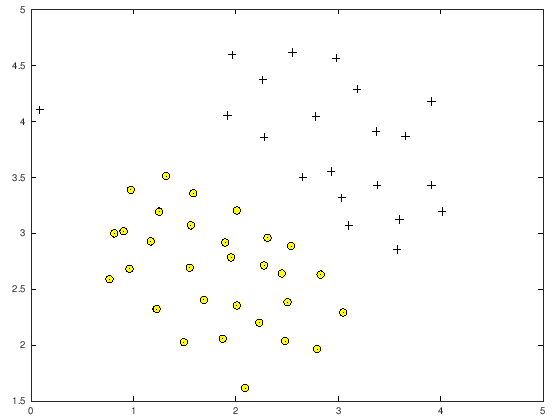

In [5]:
plotData(X, y);

## Part 2: Training Linear SVM

### You should try to change the C value below and see how the decision boundary varies (e.g., try C = 1000)


Training ....................................................... Done! 



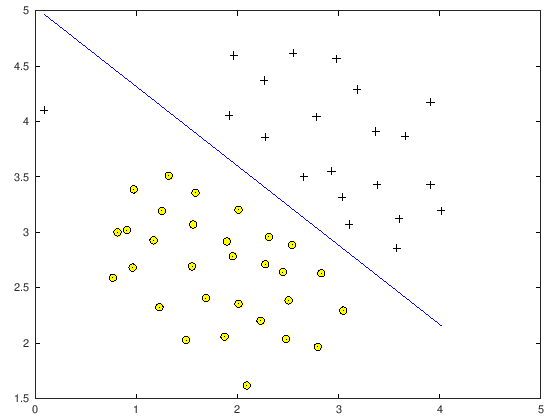

In [7]:
C = 1;
model = svmTrain(X, y, C, @linearKernel, 1e-3, 20);
visualizeBoundaryLinear(X, y, model);

## Part 3: Implementing Gaussian Kernel

In [9]:
x1 = [1 2 1]; x2 = [0 4 -1]; sigma = 2;

In [10]:
Kg = exp(-sum((x1 - x2).^2) / (2 * sigma^2)) % should be about 0.324652

Kg = 0.3247


In [11]:
sim = gaussianKernel(x1, x2, sigma)

sim = 0.3247
sim = 0.3247


## Part 4: Visualizing Dataset 2

In [11]:
load('ex6data2.mat');

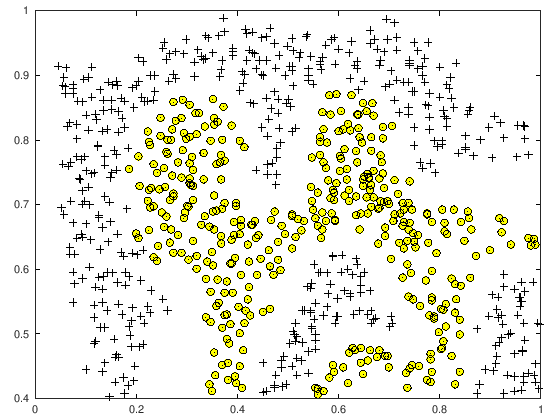

In [12]:
plotData(X, y);

In [15]:
load('ex6data2.mat');

In [16]:
C = 1; sigma = 0.1;


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
...............................................................................
.......................................... Done! 



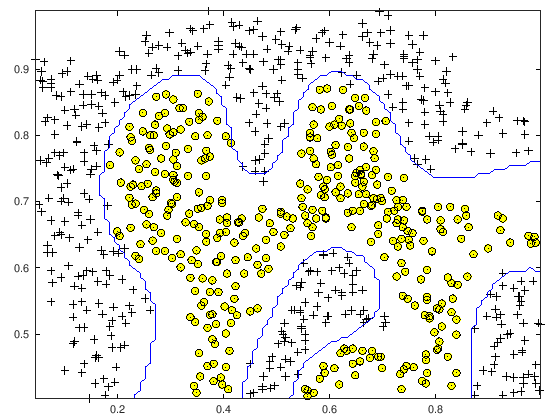

In [17]:
% We set the tolerance and max_passes lower here so that the code will run
% faster. However, in practice, you will want to run the training to
% convergence.
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma)); 
visualizeBoundary(X, y, model);

## Part 6: Visualizing Dataset 3

In [18]:
load('ex6data3.mat');

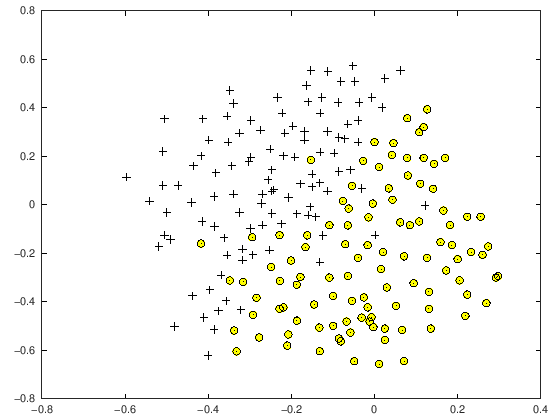

In [19]:
plotData(X, y);

## Part 7: Training SVM with RBF Kernel (Dataset 3)

In [6]:
load('ex6data3.mat');

In [27]:
train_values = [0.01 0.03 0.1 0.3 1 3 10 30];
results = zeros(length(train_values)^2,3); % C, sigma, prediction
i = 0;

In [32]:
min_err = 10^6
for C1 = train_values
    for sigma1 = train_values
        i = i + 1;
        model = svmTrain(X, y, C1, @(x1, x2) gaussianKernel(x1, x2, sigma1));
        predict = svmPredict(model, Xval);
        err = mean(double(predict ~= yval));
        results(i,:) = [C1, sigma1, err];
        if err<min_err
            min_err = err;
            C = C1;
            sigma = sigma1;
        end
        fprintf('i %d, C1 %f, sigma1 %f, err %f\n', i, C1, sigma1, err)
    end
end

min_err = 1000000

Training .............................. Done! 

i 129, C1 0.010000, sigma1 0.010000, err 0.565000

Training ........................................... Done! 

i 130, C1 0.010000, sigma1 0.030000, err 0.060000

Training ............................................... Done! 

i 131, C1 0.010000, sigma1 0.100000, err 0.045000

Training ...................................................... Done! 

i 132, C1 0.010000, sigma1 0.300000, err 0.145000

Training ................................ Done! 

i 133, C1 0.010000, sigma1 1.000000, err 0.180000

Training ........................................... Done! 

i 134, C1 0.010000, sigma1 3.000000, err 0.180000

Training ................................. Done! 

i 135, C1 0.010000, sigma1 10.000000, err 0.180000

Training ................................................. Done! 

i 136, C1 0.010000, sigma1 30.000000, err 0.180000

Training ................................. Done! 

i 137, C1 0.030000, sigma1 0.010000, err 0.56

In [33]:
min(results(:,3))

ans = 0.030000


In [34]:
min_err

min_err = 0.030000


In [12]:
[C, sigma] = dataset3Params(X, y, Xval, yval);


Training ......... Done! 


Training .......................................... Done! 


Training ......................................................................
........... Done! 


Training ........................................................ Done! 


Training ............................................. Done! 


Training .............................................. Done! 


Training .................................... Done! 


Training ......................................................................
. Done! 


Training ......... Done! 


Training ..................................................... Done! 


Training ...................................... Done! 


Training ................................................... Done! 


Training ................................................. Done! 


Training ....................... Done! 


Training ..................................................................... Done! 


Training .........................

In [13]:
fprintf('C %f, sigma %f', C, sigma);

C 1.000000, sigma 0.100000

In [15]:
% Train the SVM
model= svmTrain(X, y, C, @(x1, x2) gaussianKernel(x1, x2, sigma));


Training ......................................................................
...............................................................................
...............................................................................
...............................................................................
... Done! 



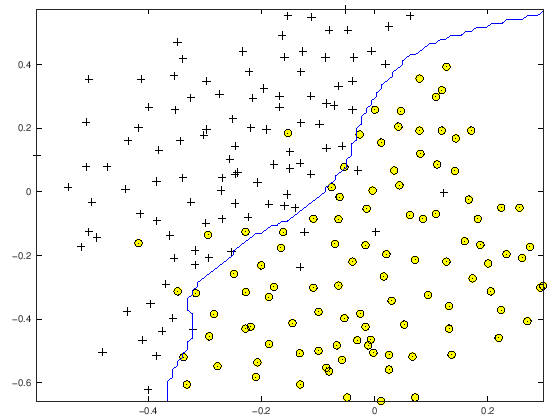

In [16]:
visualizeBoundary(X, y, model);